Problem 1a) (CIFAR-10 Without Dropout) AlexNet

Files already downloaded and verified
Files already downloaded and verified
Epoch 5: Train Loss: 0.5193, Train Acc: 81.62%
           Val Loss: 0.7210, Val Acc: 75.99%

Epoch 10: Train Loss: 0.1305, Train Acc: 95.52%
           Val Loss: 1.0359, Val Acc: 76.50%

Epoch 15: Train Loss: 0.0802, Train Acc: 97.22%
           Val Loss: 1.1817, Val Acc: 76.45%

Epoch 20: Train Loss: 0.0521, Train Acc: 98.25%
           Val Loss: 1.4563, Val Acc: 76.27%

Epoch 25: Train Loss: 0.0417, Train Acc: 98.60%
           Val Loss: 1.6192, Val Acc: 76.86%

Epoch 30: Train Loss: 0.0453, Train Acc: 98.56%
           Val Loss: 1.6650, Val Acc: 75.56%

Epoch 35: Train Loss: 0.0331, Train Acc: 98.93%
           Val Loss: 1.7790, Val Acc: 77.04%

Epoch 40: Train Loss: 0.0377, Train Acc: 98.87%
           Val Loss: 1.8188, Val Acc: 77.08%

Epoch 45: Train Loss: 0.0292, Train Acc: 99.14%
           Val Loss: 1.7814, Val Acc: 76.06%

Epoch 50: Train Loss: 0.0348, Train Acc: 98.98%
           Val Loss: 1.8532, Va

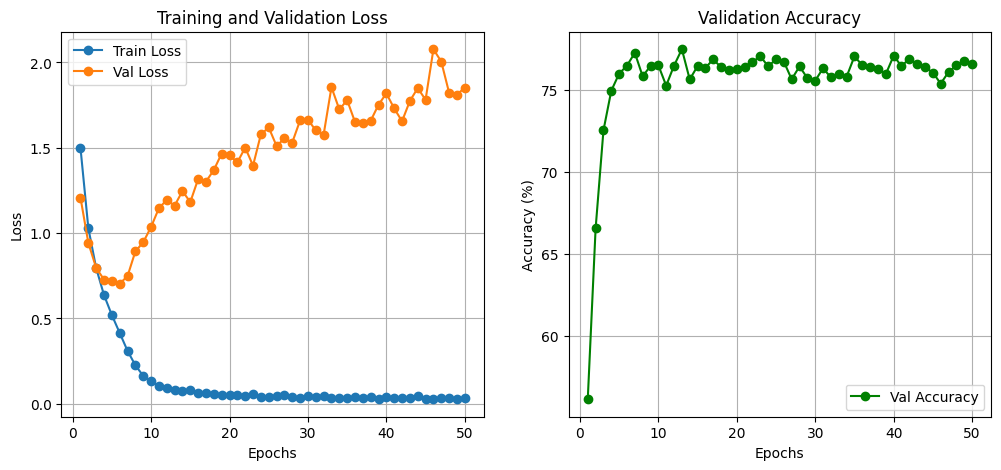

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define a smaller AlexNet for CIFAR-10 
class SmallAlexNetCIFAR10(nn.Module):
    def __init__(self):
        super(SmallAlexNetCIFAR10, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(128 * 4 * 4, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SmallAlexNetCIFAR10().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store metrics
train_losses, val_losses, val_accuracies = [], [], []

# Training loop
for epoch in range(1, 51):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)
    train_acc = 100 * correct / total

    # Validation step
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_loss /= len(testloader)
    val_losses.append(val_loss)
    val_acc = 100 * val_correct / val_total
    val_accuracies.append(val_acc)

    if epoch % 5 == 0:
        print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
        print(f"           Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%\n")

print(f"Total Parameters: {sum(p.numel() for p in model.parameters())}")

# Plotting
epochs = range(1, 51)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, val_losses, label='Val Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracies, label='Val Accuracy', marker='o', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy')
plt.legend()
plt.grid()

plt.show()


Problem 1b) (CIFAR-10 With Dropout) AlexNet

Files already downloaded and verified
Files already downloaded and verified
Epoch 5: Train Loss: 0.5660, Train Acc: 80.23%
           Val Loss: 0.7187, Val Acc: 75.44%

Epoch 10: Train Loss: 0.1879, Train Acc: 93.48%
           Val Loss: 0.8625, Val Acc: 77.28%

Epoch 15: Train Loss: 0.0964, Train Acc: 96.73%
           Val Loss: 1.1359, Val Acc: 77.96%

Epoch 20: Train Loss: 0.0761, Train Acc: 97.39%
           Val Loss: 1.1629, Val Acc: 77.52%

Epoch 25: Train Loss: 0.0721, Train Acc: 97.60%
           Val Loss: 1.3162, Val Acc: 77.20%

Epoch 30: Train Loss: 0.0608, Train Acc: 98.04%
           Val Loss: 1.3611, Val Acc: 77.61%

Epoch 35: Train Loss: 0.0542, Train Acc: 98.32%
           Val Loss: 1.4505, Val Acc: 77.34%

Epoch 40: Train Loss: 0.0515, Train Acc: 98.39%
           Val Loss: 1.6063, Val Acc: 76.79%

Epoch 45: Train Loss: 0.0530, Train Acc: 98.37%
           Val Loss: 1.4519, Val Acc: 76.30%

Epoch 50: Train Loss: 0.0456, Train Acc: 98.54%
           Val Loss: 1.6644, Va

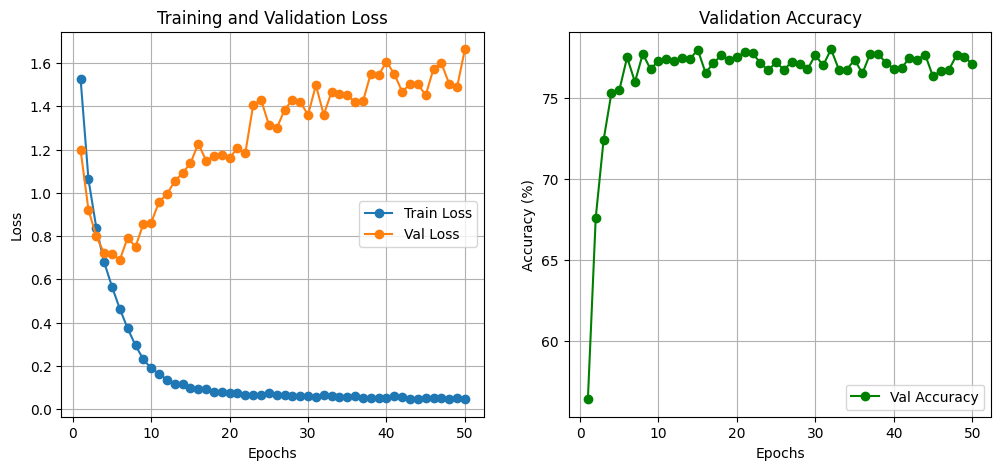

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define a smaller AlexNet for CIFAR-10 with Batch Normalization
class SmallAlexNetCIFAR10(nn.Module):
    def __init__(self):
        super(SmallAlexNetCIFAR10, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(128 * 4 * 4, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.2),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.2),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SmallAlexNetCIFAR10().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store metrics
train_losses, val_losses, val_accuracies = [], [], []

# Training loop
for epoch in range(1, 51): 
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)
    train_acc = 100 * correct / total

    # Validation step
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_loss /= len(testloader)
    val_losses.append(val_loss)
    val_acc = 100 * val_correct / val_total
    val_accuracies.append(val_acc)

    if epoch % 5 == 0:
        print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
        print(f"           Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%\n")

print(f"Total Parameters: {sum(p.numel() for p in model.parameters())}")

# Plotting
epochs = range(1, 51)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, val_losses, label='Val Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracies, label='Val Accuracy', marker='o', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy')
plt.legend()
plt.grid()

plt.show()


Problem 1c) (CIFAR-100 Without Dropout) AlexNet

CUDA Device: NVIDIA GeForce GTX 1650
Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train Loss: 4.0035, Train Acc: 7.26%
           Val Loss: 3.6783, Val Acc: 12.73%

Epoch 2: Train Loss: 3.3265, Train Acc: 18.43%
           Val Loss: 3.1151, Val Acc: 23.68%

Epoch 3: Train Loss: 2.9205, Train Acc: 26.70%
           Val Loss: 2.8927, Val Acc: 28.52%

Epoch 4: Train Loss: 2.6298, Train Acc: 32.32%
           Val Loss: 2.6694, Val Acc: 32.51%

Epoch 5: Train Loss: 2.3772, Train Acc: 37.44%
           Val Loss: 2.6405, Val Acc: 33.81%

Epoch 6: Train Loss: 2.1518, Train Acc: 42.50%
           Val Loss: 2.5431, Val Acc: 36.57%

Epoch 7: Train Loss: 1.9333, Train Acc: 47.13%
           Val Loss: 2.6109, Val Acc: 36.36%

Epoch 8: Train Loss: 1.7249, Train Acc: 52.05%
           Val Loss: 2.6982, Val Acc: 36.83%

Epoch 9: Train Loss: 1.5222, Train Acc: 56.58%
           Val Loss: 2.8288, Val Acc: 36.28%

Epoch 10: Train Loss: 1.3233, Train Acc: 61.32%
   

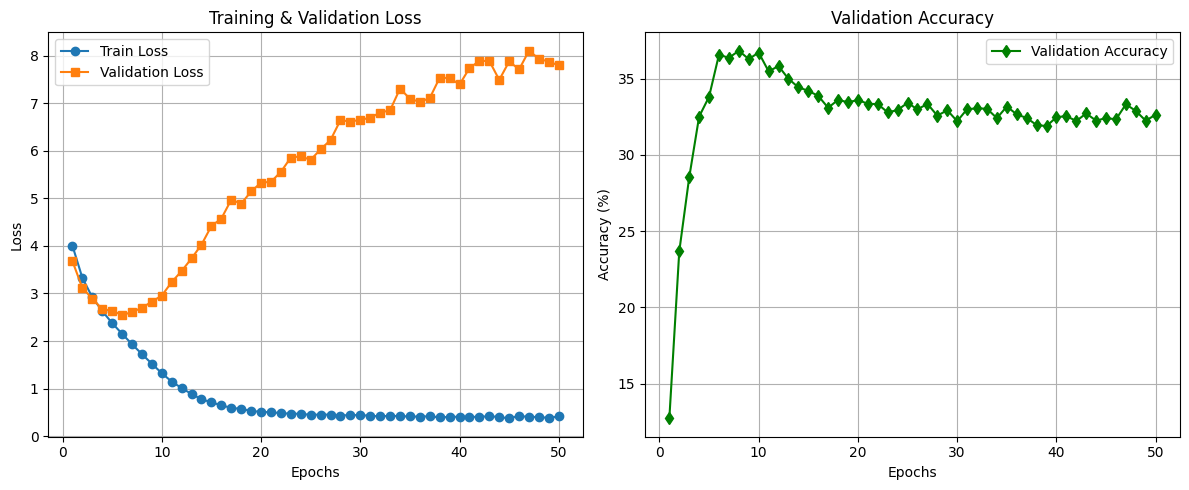

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt  

if torch.cuda.is_available():
    print(f"CUDA Device: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available.")

# Define a smaller AlexNet for CIFAR-100 with Dropout
class SmallAlexNetCIFAR100(nn.Module):
    def __init__(self):
        super(SmallAlexNetCIFAR100, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(128 * 4 * 4, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 100),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Load CIFAR-100 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SmallAlexNetCIFAR100().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
torch.cuda.empty_cache()

# Lists to store losses and accuracy
train_losses, val_losses, val_accuracies = [], [], []

# Training loop
for epoch in range(1, 51):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    # Validation step
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_acc = 100 * val_correct / val_total
    val_losses.append(val_loss / len(testloader))
    val_accuracies.append(val_acc)

    # Print epoch details
    print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"           Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_acc:.2f}%\n")

    torch.cuda.empty_cache()

print(f"Total Parameters: {sum(p.numel() for p in model.parameters())}")

# Plot Loss and Accuracy Graphs
plt.figure(figsize=(12, 5))

# Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, 51), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, 51), val_losses, label='Validation Loss', marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid()

# Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, 51), val_accuracies, label='Validation Accuracy', marker='d', color='green')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Validation Accuracy")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Problem 1d) (CIFAR-100 With Dropout) AlexNet

CUDA Device: NVIDIA GeForce GTX 1650
Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train Loss: 4.1106, Train Acc: 5.45%
           Val Loss: 3.7337, Val Acc: 11.74%

Epoch 2: Train Loss: 3.5261, Train Acc: 14.97%
           Val Loss: 3.2587, Val Acc: 20.28%

Epoch 3: Train Loss: 3.1699, Train Acc: 21.62%
           Val Loss: 3.0003, Val Acc: 25.44%

Epoch 4: Train Loss: 2.9323, Train Acc: 26.23%
           Val Loss: 2.8231, Val Acc: 28.75%

Epoch 5: Train Loss: 2.7483, Train Acc: 30.07%
           Val Loss: 2.7847, Val Acc: 30.51%

Epoch 6: Train Loss: 2.5960, Train Acc: 32.95%
           Val Loss: 2.6814, Val Acc: 32.24%

Epoch 7: Train Loss: 2.4716, Train Acc: 35.64%
           Val Loss: 2.5693, Val Acc: 34.89%

Epoch 8: Train Loss: 2.3524, Train Acc: 38.08%
           Val Loss: 2.5336, Val Acc: 35.82%

Epoch 9: Train Loss: 2.2322, Train Acc: 40.49%
           Val Loss: 2.5345, Val Acc: 35.76%

Epoch 10: Train Loss: 2.1464, Train Acc: 42.44%
   

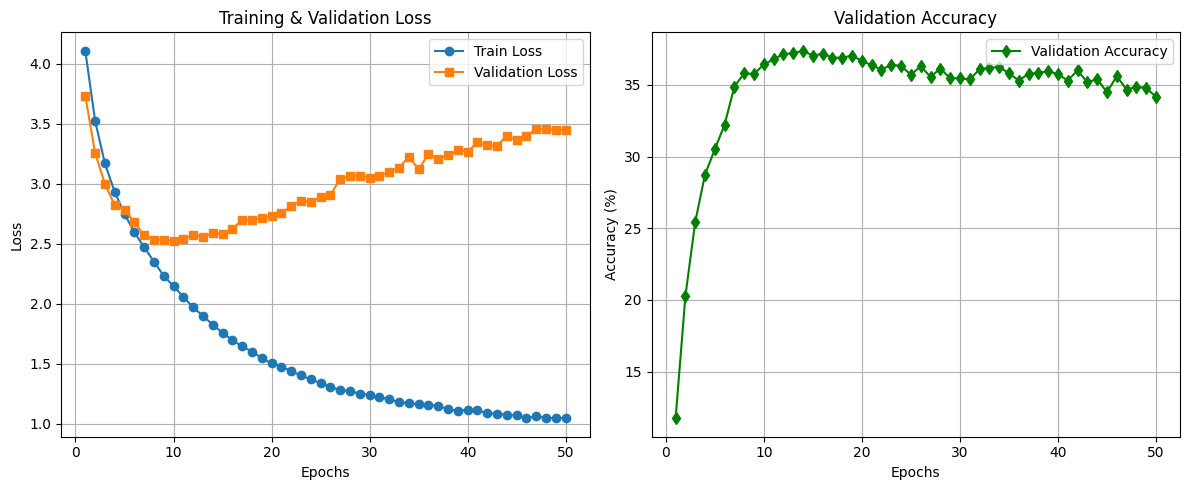

: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt  # Import Matplotlib for graph plotting

if torch.cuda.is_available():
    print(f"CUDA Device: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available.")

# Define a smaller AlexNet for CIFAR-100 with Dropout and Batch Normalization
class SmallAlexNetCIFAR100(nn.Module):
    def __init__(self):
        super(SmallAlexNetCIFAR100, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(128 * 4 * 4, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.25),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.25),
            nn.Linear(512, 100),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Load CIFAR-100 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SmallAlexNetCIFAR100().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
torch.cuda.empty_cache()

# Lists to store losses and accuracy
train_losses, val_losses, val_accuracies = [], [], []

# Training loop
for epoch in range(1, 51):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    # Validation step
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_acc = 100 * val_correct / val_total
    val_losses.append(val_loss / len(testloader))
    val_accuracies.append(val_acc)

    # Print epoch details
    print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"           Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_acc:.2f}%\n")

    torch.cuda.empty_cache()

print(f"Total Parameters: {sum(p.numel() for p in model.parameters())}")

# Plot Loss and Accuracy Graphs
plt.figure(figsize=(12, 5))

# Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, 51), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, 51), val_losses, label='Validation Loss', marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid()

# Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, 51), val_accuracies, label='Validation Accuracy', marker='d', color='green')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Validation Accuracy")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


2a) VGGNet CIFAR-10 Without Dropout

Files already downloaded and verified
Files already downloaded and verified
Total Parameters: 2,799,754
Epoch 1: Train Loss: 1.7053, Train Acc: 35.12%
           Val Loss: 1.3794, Val Acc: 47.84%

Epoch 2: Train Loss: 1.2116, Train Acc: 55.70%
           Val Loss: 1.0397, Val Acc: 62.47%

Epoch 3: Train Loss: 0.9450, Train Acc: 66.34%
           Val Loss: 0.9016, Val Acc: 68.72%

Epoch 4: Train Loss: 0.7745, Train Acc: 72.71%
           Val Loss: 0.7821, Val Acc: 73.18%

Epoch 5: Train Loss: 0.6467, Train Acc: 77.46%
           Val Loss: 0.7456, Val Acc: 74.65%

Epoch 6: Train Loss: 0.5316, Train Acc: 81.52%
           Val Loss: 0.7343, Val Acc: 75.17%

Epoch 7: Train Loss: 0.4358, Train Acc: 84.71%
           Val Loss: 0.7252, Val Acc: 76.41%

Epoch 8: Train Loss: 0.3458, Train Acc: 88.05%
           Val Loss: 0.7790, Val Acc: 76.70%

Epoch 9: Train Loss: 0.2811, Train Acc: 90.12%
           Val Loss: 0.7851, Val Acc: 76.31%

Epoch 10: Train Loss: 0.2288, Train Acc: 92.06%
           

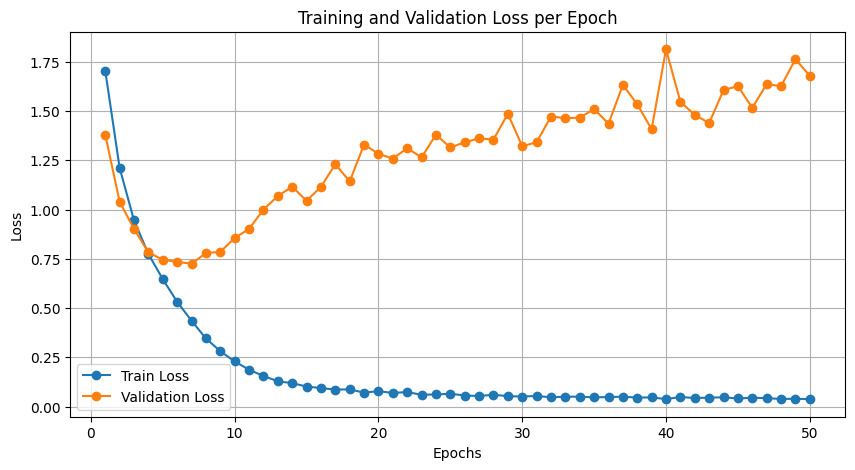

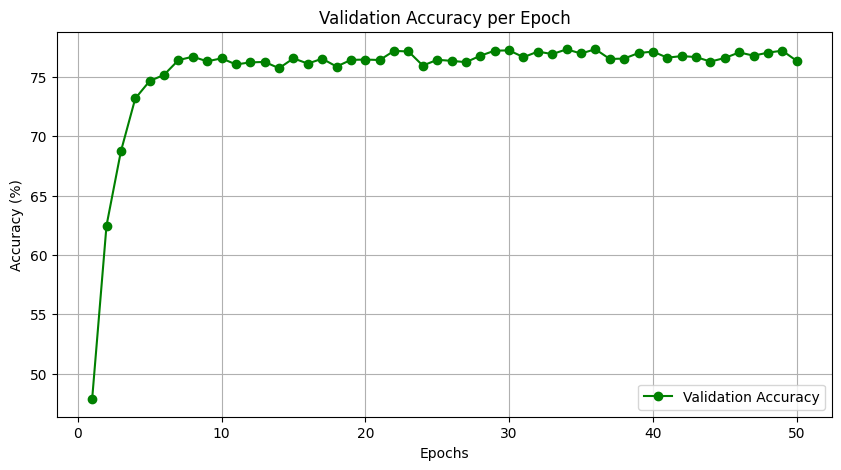

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define a VGG-11-like model for CIFAR-10 (Around 3M Parameters)
class VGGNetCIFAR10(nn.Module):
    def __init__(self):
        super(VGGNetCIFAR10, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(256 * 2 * 2, 512),  # Adjusted input size based on CIFAR-10 feature map
            nn.ReLU(inplace=True),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.classifier(x)
        return x

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGGNetCIFAR10().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

total_params = sum(p.numel() for p in model.parameters())
print(f"Total Parameters: {total_params:,}")

# Lists to store loss and accuracy per epoch
train_losses = []
val_losses = []
val_accuracies = []

# Training loop
num_epochs = 50
for epoch in range(1, num_epochs + 1):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)
    train_acc = 100 * correct / total

    # Validation step
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_loss /= len(testloader)
    val_losses.append(val_loss)
    val_acc = 100 * val_correct / val_total
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"           Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%\n")

# Plot Training Loss and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.grid()
plt.show()

# Plot Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', marker='o', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy per Epoch')
plt.legend()
plt.grid()
plt.show()


2b) VGGNet CIFAR-10 With Dropout

Files already downloaded and verified
Files already downloaded and verified
Total Parameters: 2,799,754
Epoch 1: Train Loss: 1.8155, Train Acc: 29.60%
           Val Loss: 1.4546, Val Acc: 45.58%

Epoch 2: Train Loss: 1.3473, Train Acc: 50.43%
           Val Loss: 1.2276, Val Acc: 56.24%

Epoch 3: Train Loss: 1.1429, Train Acc: 59.02%
           Val Loss: 0.9798, Val Acc: 65.38%

Epoch 4: Train Loss: 0.9995, Train Acc: 64.73%
           Val Loss: 0.8947, Val Acc: 68.93%

Epoch 5: Train Loss: 0.8996, Train Acc: 68.95%
           Val Loss: 0.8349, Val Acc: 71.25%

Epoch 6: Train Loss: 0.8230, Train Acc: 71.63%
           Val Loss: 0.7751, Val Acc: 73.78%

Epoch 7: Train Loss: 0.7550, Train Acc: 73.88%
           Val Loss: 0.7302, Val Acc: 74.84%

Epoch 8: Train Loss: 0.7144, Train Acc: 75.41%
           Val Loss: 0.7196, Val Acc: 75.83%

Epoch 9: Train Loss: 0.6677, Train Acc: 76.91%
           Val Loss: 0.7443, Val Acc: 75.32%

Epoch 10: Train Loss: 0.6335, Train Acc: 78.15%
           

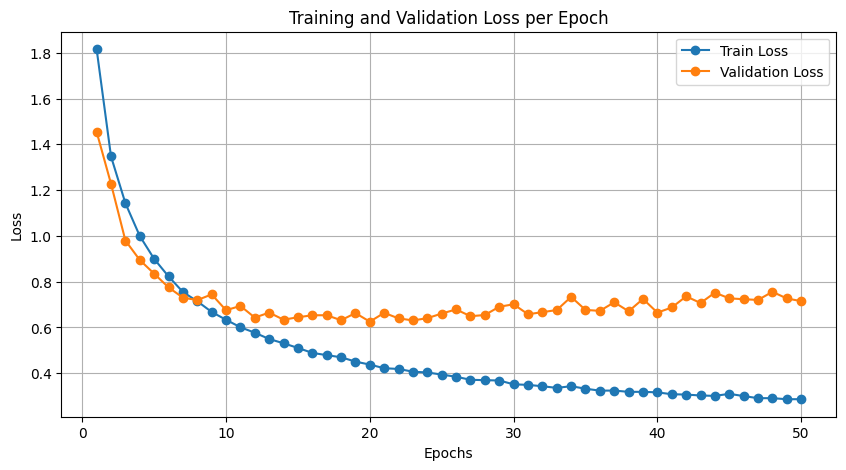

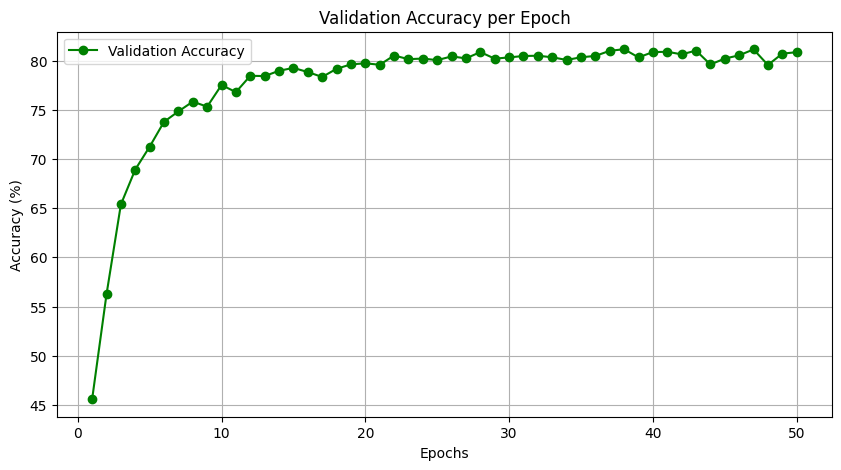

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define a VGG-11-like model for CIFAR-10 with Dropout (0.25)
class VGGNetCIFAR10(nn.Module):
    def __init__(self):
        super(VGGNetCIFAR10, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25)
        )

        self.classifier = nn.Sequential(
            nn.Linear(256 * 2 * 2, 512),  # Adjusted input size based on CIFAR-10 feature map
            nn.ReLU(inplace=True),
            nn.Dropout(0.25),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.25),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.classifier(x)
        return x

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGGNetCIFAR10().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

total_params = sum(p.numel() for p in model.parameters())
print(f"Total Parameters: {total_params:,}")

# Lists to store loss and accuracy per epoch
train_losses = []
val_losses = []
val_accuracies = []

# Training loop
num_epochs = 50
for epoch in range(1, num_epochs + 1):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)
    train_acc = 100 * correct / total

    # Validation step
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_loss /= len(testloader)
    val_losses.append(val_loss)
    val_acc = 100 * val_correct / val_total
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"           Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%\n")

# Plot Training Loss and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.grid()
plt.show()

# Plot Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', marker='o', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy per Epoch')
plt.legend()
plt.grid()
plt.show()


2c) CIFAR-100 Without Dropout

Files already downloaded and verified
Files already downloaded and verified
Total Parameters: 2,822,884
Epoch 1: Train Loss: 4.1561, Train Acc: 4.69%
           Val Loss: 3.9079, Val Acc: 7.21%

Epoch 2: Train Loss: 3.7066, Train Acc: 10.44%
           Val Loss: 3.5168, Val Acc: 13.70%

Epoch 3: Train Loss: 3.3480, Train Acc: 17.01%
           Val Loss: 3.1355, Val Acc: 21.58%

Epoch 4: Train Loss: 2.9680, Train Acc: 24.85%
           Val Loss: 2.8788, Val Acc: 26.74%

Epoch 5: Train Loss: 2.6323, Train Acc: 31.51%
           Val Loss: 2.6416, Val Acc: 31.52%

Epoch 6: Train Loss: 2.3605, Train Acc: 37.06%
           Val Loss: 2.5422, Val Acc: 34.35%

Epoch 7: Train Loss: 2.1203, Train Acc: 42.30%
           Val Loss: 2.4150, Val Acc: 37.09%

Epoch 8: Train Loss: 1.9139, Train Acc: 47.04%
           Val Loss: 2.3798, Val Acc: 39.28%

Epoch 9: Train Loss: 1.7133, Train Acc: 51.49%
           Val Loss: 2.3465, Val Acc: 41.18%

Epoch 10: Train Loss: 1.5189, Train Acc: 56.15%
           Va

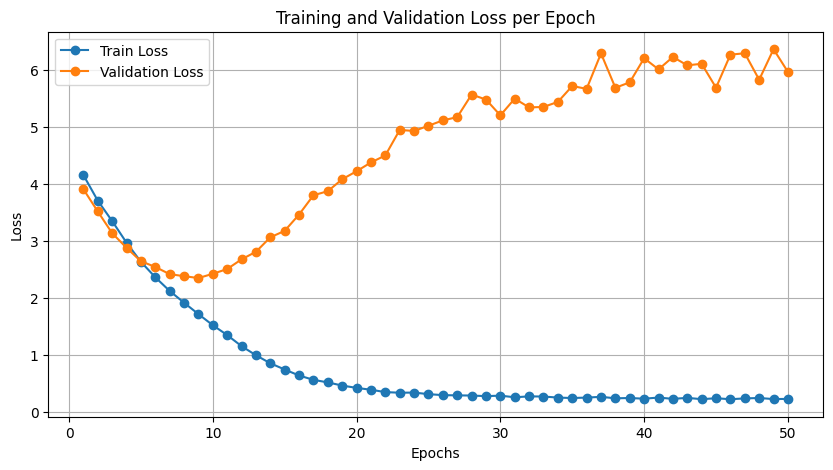

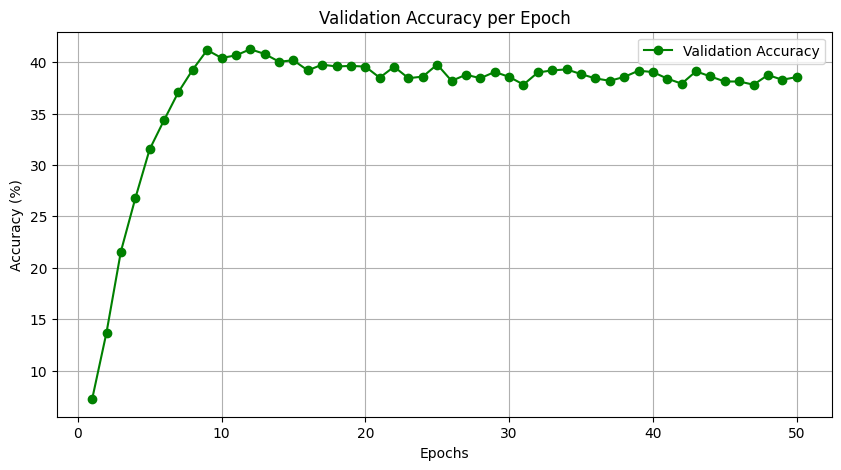

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define a VGG-11-like model for CIFAR-100 without Dropout
class VGGNetCIFAR100(nn.Module):
    def __init__(self):
        super(VGGNetCIFAR100, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(256 * 2 * 2, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 100)  # Output layer for CIFAR-100
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.classifier(x)
        return x

# Load CIFAR-100 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGGNetCIFAR100().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

total_params = sum(p.numel() for p in model.parameters())
print(f"Total Parameters: {total_params:,}")

# Lists to store loss and accuracy per epoch
train_losses = []
val_losses = []
val_accuracies = []

# Training loop
num_epochs = 50
for epoch in range(1, num_epochs + 1):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)
    train_acc = 100 * correct / total

    # Validation step
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_loss /= len(testloader)
    val_losses.append(val_loss)
    val_acc = 100 * val_correct / val_total
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"           Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%\n")

# Plot Training Loss and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.grid()
plt.show()

# Plot Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', marker='o', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy per Epoch')
plt.legend()
plt.grid()
plt.show()


2d) CIFAR-100 With Dropout

Files already downloaded and verified
Files already downloaded and verified
Total Parameters: 2,822,884
Epoch 1: Train Loss: 4.2998, Train Acc: 2.96%
           Val Loss: 4.0199, Val Acc: 6.18%

Epoch 2: Train Loss: 3.9009, Train Acc: 7.29%
           Val Loss: 3.7828, Val Acc: 9.68%

Epoch 3: Train Loss: 3.6590, Train Acc: 11.57%
           Val Loss: 3.4475, Val Acc: 16.07%

Epoch 4: Train Loss: 3.4155, Train Acc: 16.46%
           Val Loss: 3.1667, Val Acc: 21.20%

Epoch 5: Train Loss: 3.2113, Train Acc: 20.16%
           Val Loss: 3.0264, Val Acc: 23.69%

Epoch 6: Train Loss: 3.0427, Train Acc: 23.88%
           Val Loss: 2.8433, Val Acc: 28.15%

Epoch 7: Train Loss: 2.9035, Train Acc: 26.81%
           Val Loss: 2.7354, Val Acc: 30.10%

Epoch 8: Train Loss: 2.7908, Train Acc: 28.77%
           Val Loss: 2.6271, Val Acc: 33.01%

Epoch 9: Train Loss: 2.6734, Train Acc: 31.19%
           Val Loss: 2.5318, Val Acc: 34.38%

Epoch 10: Train Loss: 2.5743, Train Acc: 33.26%
           Val 

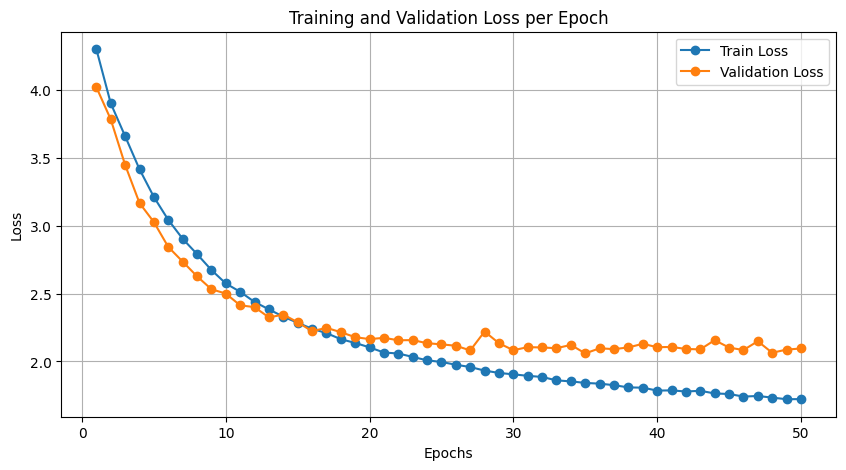

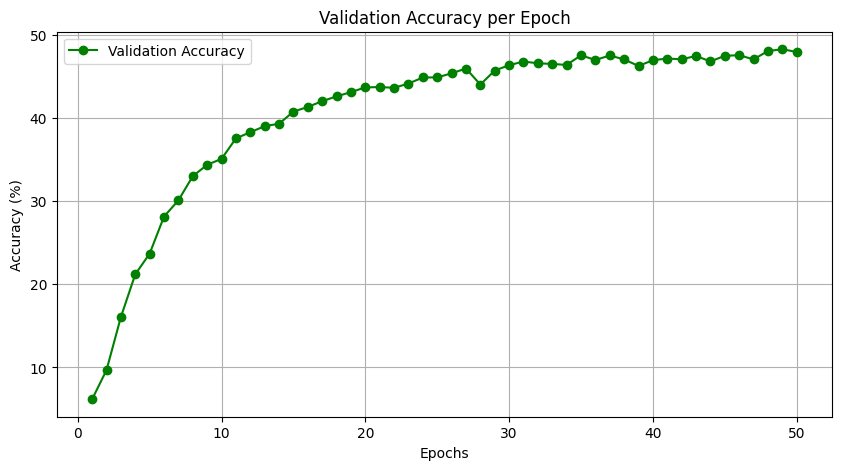

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define a VGG-11-like model for CIFAR-100 with Dropout (0.25)
class VGGNetCIFAR100(nn.Module):
    def __init__(self):
        super(VGGNetCIFAR100, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25)
        )

        self.classifier = nn.Sequential(
            nn.Linear(256 * 2 * 2, 512),  # Adjusted input size based on CIFAR-100 feature map
            nn.ReLU(inplace=True),
            nn.Dropout(0.25),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.25),
            nn.Linear(256, 100)  # Changed output to 100 classes
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.classifier(x)
        return x

# Load CIFAR-100 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGGNetCIFAR100().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

total_params = sum(p.numel() for p in model.parameters())
print(f"Total Parameters: {total_params:,}")

# Lists to store loss and accuracy per epoch
train_losses = []
val_losses = []
val_accuracies = []

# Training loop
num_epochs = 50
for epoch in range(1, num_epochs + 1):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)
    train_acc = 100 * correct / total

    # Validation step
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_loss /= len(testloader)
    val_losses.append(val_loss)
    val_acc = 100 * val_correct / val_total
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"           Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%\n")

# Plot Training Loss and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.grid()
plt.show()

# Plot Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', marker='o', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy per Epoch')
plt.legend()
plt.grid()
plt.show()


3a) ResNet-18 for CIFAR-10

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train Loss: 1.2802, Train Acc: 53.18%, Val Loss: 1.3158, Val Acc: 56.71%
Epoch 2: Train Loss: 0.7923, Train Acc: 71.85%, Val Loss: 0.7754, Val Acc: 73.23%
Epoch 3: Train Loss: 0.5909, Train Acc: 79.32%, Val Loss: 0.6736, Val Acc: 76.54%
Epoch 4: Train Loss: 0.4695, Train Acc: 83.65%, Val Loss: 0.6758, Val Acc: 77.45%
Epoch 5: Train Loss: 0.3697, Train Acc: 87.19%, Val Loss: 0.6596, Val Acc: 78.33%
Epoch 6: Train Loss: 0.2897, Train Acc: 89.97%, Val Loss: 0.6093, Val Acc: 80.54%
Epoch 7: Train Loss: 0.2201, Train Acc: 92.30%, Val Loss: 0.5744, Val Acc: 82.25%
Epoch 8: Train Loss: 0.1654, Train Acc: 94.19%, Val Loss: 0.5722, Val Acc: 83.00%
Epoch 9: Train Loss: 0.1172, Train Acc: 95.84%, Val Loss: 0.6548, Val Acc: 82.06%
Epoch 10: Train Loss: 0.0968, Train Acc: 96.61%, Val Loss: 0.7430, Val Acc: 82.40%
Epoch 11: Train Loss: 0.0743, Train Acc: 97.41%, Val Loss: 0.6966, Val Acc: 82.75%
Epoch 12: Train Loss

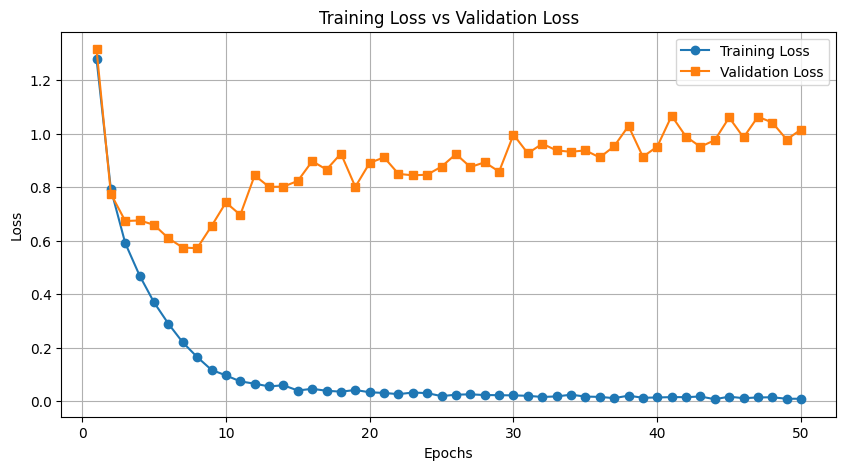

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define ResNet-18 for CIFAR-10
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != self.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        return F.relu(out)

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avgpool(out)
        out = torch.flatten(out, 1)
        return self.fc(out)

def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])

# Load CIFAR-10 dataset with correct normalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Corrected normalization
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

import matplotlib.pyplot as plt

# Lists to store loss values for plotting
train_losses = []
val_losses = []

# Training loop
for epoch in range(1, 51):  # 50 epochs
    model.train()  # Ensure model is in training mode
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)  # Store training loss

    # Validation step
    model.eval()  # Set model to evaluation mode
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_acc = 100 * val_correct / val_total
    val_loss /= len(testloader)
    val_losses.append(val_loss)  # Store validation loss

    # Improved printing format
    print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

print(f"Total Parameters: {sum(p.numel() for p in model.parameters())}")

# Plot training loss vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, 51), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, 51), val_losses, label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.grid()
plt.show()



3b) ResNet-18 for CIFAR-100

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train Loss: 3.5441, Train Acc: 15.53%, Val Loss: 3.0926, Val Acc: 23.62%
Epoch 2: Train Loss: 2.5595, Train Acc: 33.06%, Val Loss: 2.4820, Val Acc: 35.45%
Epoch 3: Train Loss: 2.0290, Train Acc: 44.45%, Val Loss: 2.1594, Val Acc: 42.27%
Epoch 4: Train Loss: 1.6598, Train Acc: 53.20%, Val Loss: 1.8846, Val Acc: 49.22%
Epoch 5: Train Loss: 1.3506, Train Acc: 60.95%, Val Loss: 1.7476, Val Acc: 52.59%
Epoch 6: Train Loss: 1.0591, Train Acc: 68.47%, Val Loss: 1.7747, Val Acc: 52.69%
Epoch 7: Train Loss: 0.7576, Train Acc: 76.90%, Val Loss: 1.8392, Val Acc: 53.84%
Epoch 8: Train Loss: 0.4892, Train Acc: 84.83%, Val Loss: 1.9388, Val Acc: 54.33%
Epoch 9: Train Loss: 0.2857, Train Acc: 91.30%, Val Loss: 2.2340, Val Acc: 52.55%
Epoch 10: Train Loss: 0.1684, Train Acc: 95.12%, Val Loss: 2.2459, Val Acc: 53.60%
Epoch 11: Train Loss: 0.1304, Train Acc: 96.11%, Val Loss: 2.3612, Val Acc: 53.89%
Epoch 12: Train Loss

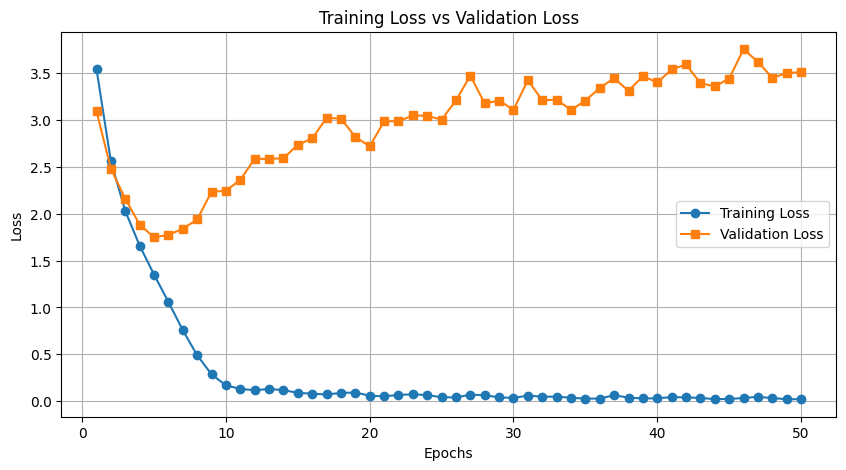

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define ResNet-18 for CIFAR-100
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != self.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        return F.relu(out)

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=100):  # Changed to 100 classes
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(512 * block.expansion, num_classes)  # Updated output layer

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avgpool(out)
        out = torch.flatten(out, 1)
        return self.fc(out)

def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])

# Load CIFAR-100 dataset with correct normalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # CIFAR-100 uses the same normalization as CIFAR-10
])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store loss values for plotting
train_losses = []
val_losses = []

# Training loop
for epoch in range(1, 51):  # 50 epochs
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    # Validation step
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_acc = 100 * val_correct / val_total
    val_loss /= len(testloader)
    val_losses.append(val_loss)

    print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

print(f"Total Parameters: {sum(p.numel() for p in model.parameters())}")

# Plot training loss vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, 51), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, 51), val_losses, label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.grid()
plt.show()


Problem 3c) ResNet-18 for CIFAR 10 with Dropout

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train Loss: 1.4877, Train Acc: 45.18%, Val Loss: 1.0915, Val Acc: 60.41%
Epoch 2: Train Loss: 1.0234, Train Acc: 63.34%, Val Loss: 0.9564, Val Acc: 66.64%
Epoch 3: Train Loss: 0.8294, Train Acc: 70.61%, Val Loss: 0.8290, Val Acc: 71.59%
Epoch 4: Train Loss: 0.7034, Train Acc: 75.25%, Val Loss: 0.6805, Val Acc: 77.10%
Epoch 5: Train Loss: 0.6123, Train Acc: 78.50%, Val Loss: 0.7273, Val Acc: 76.02%
Epoch 6: Train Loss: 0.5492, Train Acc: 80.86%, Val Loss: 0.5238, Val Acc: 82.42%
Epoch 7: Train Loss: 0.5007, Train Acc: 82.60%, Val Loss: 0.5131, Val Acc: 82.89%
Epoch 8: Train Loss: 0.4571, Train Acc: 84.12%, Val Loss: 0.5053, Val Acc: 82.80%
Epoch 9: Train Loss: 0.4222, Train Acc: 85.35%, Val Loss: 0.5027, Val Acc: 83.42%
Epoch 10: Train Loss: 0.3947, Train Acc: 86.21%, Val Loss: 0.4264, Val Acc: 85.92%
Epoch 11: Train Loss: 0.3650, Train Acc: 87.18%, Val Loss: 0.4126, Val Acc: 86.11%
Epoch 12: Train Loss

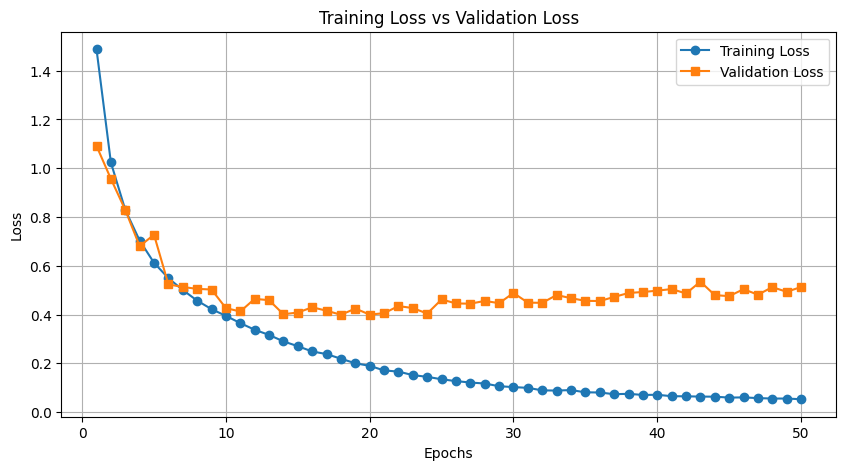

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define ResNet-18 for CIFAR-10 with Dropout
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.dropout1 = nn.Dropout(0.2)  # Dropout after first ReLU

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.dropout2 = nn.Dropout(0.2)  # Dropout after second ReLU

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != self.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.dropout1(out)  # Apply dropout after first ReLU
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return self.dropout2(out)  # Apply dropout after second ReLU

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.dropout1 = nn.Dropout(0.2)  # Dropout after first convolution

        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.dropout2 = nn.Dropout(0.2)  # Dropout after layer1

        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.dropout3 = nn.Dropout(0.2)  # Dropout after layer2

        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.dropout4 = nn.Dropout(0.2)  # Dropout after layer3

        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.dropout5 = nn.Dropout(0.2)  # Dropout after layer4

        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(512 * block.expansion, num_classes)
        self.dropout_fc = nn.Dropout(0.2)  # Dropout before FC layer

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.dropout1(out)  # Dropout after first convolution

        out = self.layer1(out)
        out = self.dropout2(out)  # Dropout after layer1

        out = self.layer2(out)
        out = self.dropout3(out)  # Dropout after layer2

        out = self.layer3(out)
        out = self.dropout4(out)  # Dropout after layer3

        out = self.layer4(out)
        out = self.dropout5(out)  # Dropout after layer4

        out = self.avgpool(out)
        out = torch.flatten(out, 1)
        out = self.dropout_fc(out)  # Dropout before FC layer
        return self.fc(out)

def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])

# Load CIFAR-10 dataset with normalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1,1]
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store loss values for plotting
train_losses = []
val_losses = []

# Training loop
for epoch in range(1, 51):  # 50 epochs
    model.train()  # Ensure model is in training mode
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)  # Store training loss

    # Validation step
    model.eval()  # Set model to evaluation mode
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_acc = 100 * val_correct / val_total
    val_loss /= len(testloader)
    val_losses.append(val_loss)  # Store validation loss

    # Print training and validation results
    print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

# Print total parameter count
print(f"Total Parameters: {sum(p.numel() for p in model.parameters())}")

# Plot training loss vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, 51), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, 51), val_losses, label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.grid()
plt.show()


Problem 3d) ResNet-18 for CIFAR 100 with Dropout

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train Loss: 3.6484, Train Acc: 13.74%, Val Loss: 3.1936, Val Acc: 21.65%
Epoch 2: Train Loss: 2.7556, Train Acc: 29.32%, Val Loss: 2.7162, Val Acc: 31.94%
Epoch 3: Train Loss: 2.2277, Train Acc: 40.10%, Val Loss: 2.1610, Val Acc: 41.97%
Epoch 4: Train Loss: 1.8907, Train Acc: 47.79%, Val Loss: 1.9879, Val Acc: 46.29%
Epoch 5: Train Loss: 1.6381, Train Acc: 53.85%, Val Loss: 1.8688, Val Acc: 48.91%
Epoch 6: Train Loss: 1.4261, Train Acc: 59.01%, Val Loss: 1.6894, Val Acc: 53.51%
Epoch 7: Train Loss: 1.2396, Train Acc: 63.68%, Val Loss: 1.7113, Val Acc: 54.47%
Epoch 8: Train Loss: 1.0620, Train Acc: 68.24%, Val Loss: 1.6342, Val Acc: 56.73%
Epoch 9: Train Loss: 0.9109, Train Acc: 72.54%, Val Loss: 1.7216, Val Acc: 55.73%
Epoch 10: Train Loss: 0.7578, Train Acc: 76.69%, Val Loss: 1.6534, Val Acc: 57.70%
Epoch 11: Train Loss: 0.6241, Train Acc: 80.42%, Val Loss: 1.8515, Val Acc: 56.62%
Epoch 12: Train Loss

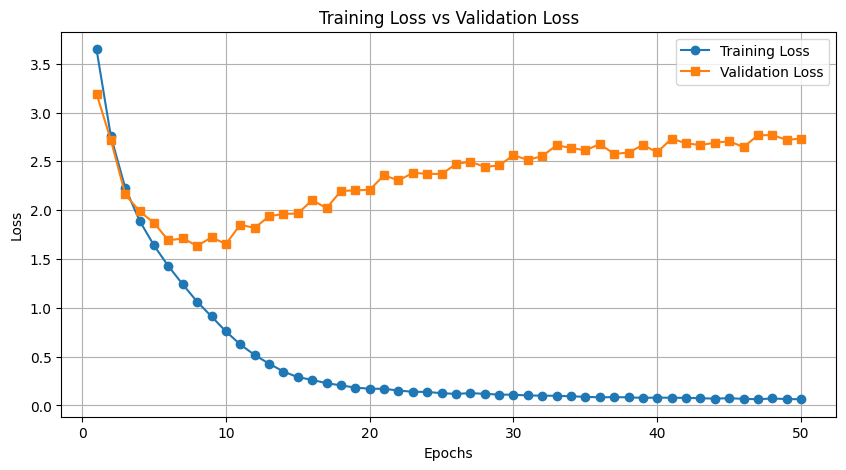

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define ResNet-18 for CIFAR-100 with Dropout
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1, dropout_rate=0.2):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.dropout1 = nn.Dropout(p=dropout_rate)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.dropout2 = nn.Dropout(p=dropout_rate)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != self.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.dropout1(out)
        out = self.bn2(self.conv2(out))
        out = self.dropout2(out)
        out += self.shortcut(x)
        return F.relu(out)

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=100, dropout_rate=0.2):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.dropout = nn.Dropout(p=dropout_rate)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1, dropout_rate=dropout_rate)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2, dropout_rate=dropout_rate)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2, dropout_rate=dropout_rate)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2, dropout_rate=dropout_rate)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, out_channels, num_blocks, stride, dropout_rate):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride, dropout_rate))
            self.in_channels = out_channels * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.dropout(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avgpool(out)
        out = torch.flatten(out, 1)
        return self.fc(out)

# Define ResNet-18
def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])

# Load CIFAR-100 dataset with correct normalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store loss values for plotting
train_losses = []
val_losses = []

# Training loop
for epoch in range(1, 51):  # 50 epochs
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    # Validation step
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_acc = 100 * val_correct / val_total
    val_loss /= len(testloader)
    val_losses.append(val_loss)

    print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

print(f"Total Parameters: {sum(p.numel() for p in model.parameters())}")

# Plot training loss vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, 51), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, 51), val_losses, label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.grid()
plt.show()


Problem 3e) ResNet-11 for CIFAR 10

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train Loss: 1.2732, Train Acc: 53.51%, Val Loss: 1.0218, Val Acc: 63.25%
Epoch 2: Train Loss: 0.8139, Train Acc: 71.20%, Val Loss: 0.9403, Val Acc: 68.45%
Epoch 3: Train Loss: 0.6074, Train Acc: 78.70%, Val Loss: 0.8119, Val Acc: 72.05%
Epoch 4: Train Loss: 0.4901, Train Acc: 82.90%, Val Loss: 0.5866, Val Acc: 79.85%
Epoch 5: Train Loss: 0.3954, Train Acc: 86.42%, Val Loss: 0.5438, Val Acc: 81.37%
Epoch 6: Train Loss: 0.3197, Train Acc: 88.84%, Val Loss: 0.6100, Val Acc: 79.90%
Epoch 7: Train Loss: 0.2498, Train Acc: 91.26%, Val Loss: 0.6164, Val Acc: 80.77%
Epoch 8: Train Loss: 0.1954, Train Acc: 93.24%, Val Loss: 0.6532, Val Acc: 80.99%
Epoch 9: Train Loss: 0.1418, Train Acc: 95.11%, Val Loss: 0.5605, Val Acc: 83.62%
Epoch 10: Train Loss: 0.1084, Train Acc: 96.19%, Val Loss: 0.6339, Val Acc: 82.53%
Epoch 11: Train Loss: 0.0806, Train Acc: 97.16%, Val Loss: 0.6829, Val Acc: 83.59%
Epoch 12: Train Loss

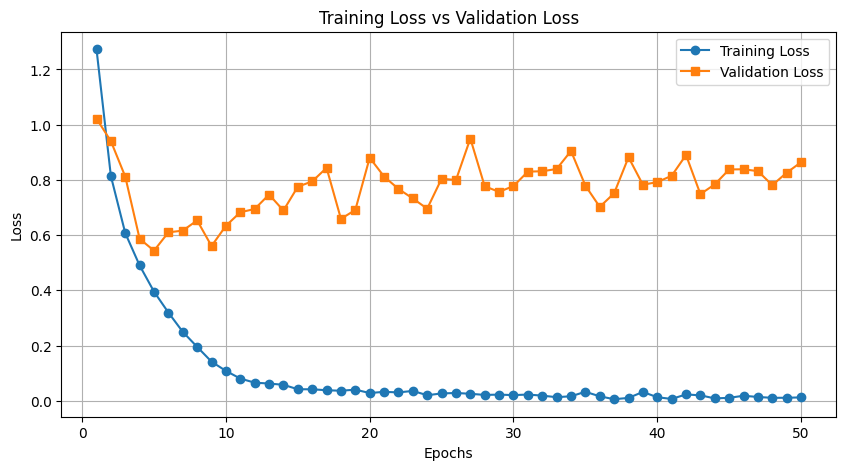

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define ResNet-11 for CIFAR-10
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != self.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        return F.relu(out)

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):  # Changed to 10 classes
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(256 * block.expansion, num_classes)

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avgpool(out)
        out = torch.flatten(out, 1)
        return self.fc(out)

def ResNet11():
    return ResNet(BasicBlock, [2, 2, 2])

# Load CIFAR-10 dataset with correct normalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet11().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store loss values for plotting
train_losses = []
val_losses = []

# Training loop
for epoch in range(1, 51):  # 50 epochs
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    # Validation step
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_acc = 100 * val_correct / val_total
    val_loss /= len(testloader)
    val_losses.append(val_loss)

    print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

print(f"Total Parameters: {sum(p.numel() for p in model.parameters())}")

# Plot training loss vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, 51), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, 51), val_losses, label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.grid()
plt.show()


Problem 3f) ResNet-11 for CIFAR 100

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train Loss: 3.7535, Train Acc: 11.84%, Val Loss: 3.4424, Val Acc: 16.23%
Epoch 2: Train Loss: 2.9030, Train Acc: 26.15%, Val Loss: 2.6224, Val Acc: 31.88%
Epoch 3: Train Loss: 2.3842, Train Acc: 36.75%, Val Loss: 2.3073, Val Acc: 38.65%
Epoch 4: Train Loss: 2.0214, Train Acc: 44.82%, Val Loss: 2.1314, Val Acc: 42.35%
Epoch 5: Train Loss: 1.7528, Train Acc: 51.16%, Val Loss: 1.9826, Val Acc: 46.20%
Epoch 6: Train Loss: 1.5333, Train Acc: 56.58%, Val Loss: 1.8132, Val Acc: 50.39%
Epoch 7: Train Loss: 1.3490, Train Acc: 61.17%, Val Loss: 1.6822, Val Acc: 52.89%
Epoch 8: Train Loss: 1.1716, Train Acc: 65.79%, Val Loss: 1.6584, Val Acc: 54.64%
Epoch 9: Train Loss: 1.0046, Train Acc: 70.28%, Val Loss: 1.5562, Val Acc: 57.02%
Epoch 10: Train Loss: 0.8506, Train Acc: 74.72%, Val Loss: 1.7846, Val Acc: 54.44%
Epoch 11: Train Loss: 0.6914, Train Acc: 79.05%, Val Loss: 1.6873, Val Acc: 56.77%
Epoch 12: Train Loss

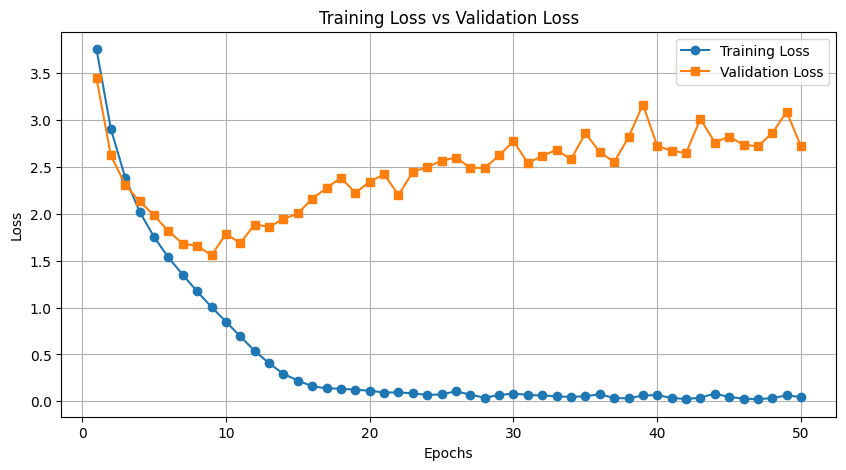

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define ResNet-11 for CIFAR-100
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != self.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        return F.relu(out)

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=100):  # Changed to 100 classes
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(256 * block.expansion, num_classes)

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avgpool(out)
        out = torch.flatten(out, 1)
        return self.fc(out)

def ResNet11():
    return ResNet(BasicBlock, [2, 2, 2])

# Load CIFAR-100 dataset with correct normalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet11().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store loss values for plotting
train_losses = []
val_losses = []

# Training loop
for epoch in range(1, 51):  # 50 epochs
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    # Validation step
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_acc = 100 * val_correct / val_total
    val_loss /= len(testloader)
    val_losses.append(val_loss)

    print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

print(f"Total Parameters: {sum(p.numel() for p in model.parameters())}")

# Plot training loss vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, 51), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, 51), val_losses, label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.grid()
plt.show()


Problem 3g) ResNet-11 for CIFAR 10 with Dropout

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train Loss: 1.3035, Train Acc: 52.51%, Val Loss: 1.0803, Val Acc: 61.98%
Epoch 2: Train Loss: 0.8634, Train Acc: 69.40%, Val Loss: 0.9256, Val Acc: 68.56%
Epoch 3: Train Loss: 0.6846, Train Acc: 75.79%, Val Loss: 0.6764, Val Acc: 77.17%
Epoch 4: Train Loss: 0.5803, Train Acc: 79.71%, Val Loss: 0.6539, Val Acc: 78.29%
Epoch 5: Train Loss: 0.5052, Train Acc: 82.46%, Val Loss: 0.6384, Val Acc: 78.47%
Epoch 6: Train Loss: 0.4515, Train Acc: 84.21%, Val Loss: 0.5052, Val Acc: 82.94%
Epoch 7: Train Loss: 0.4004, Train Acc: 85.92%, Val Loss: 0.4684, Val Acc: 84.64%
Epoch 8: Train Loss: 0.3603, Train Acc: 87.39%, Val Loss: 0.4516, Val Acc: 84.75%
Epoch 9: Train Loss: 0.3243, Train Acc: 88.59%, Val Loss: 0.4717, Val Acc: 84.44%
Epoch 10: Train Loss: 0.2929, Train Acc: 89.66%, Val Loss: 0.4455, Val Acc: 85.50%
Epoch 11: Train Loss: 0.2628, Train Acc: 90.59%, Val Loss: 0.4408, Val Acc: 85.82%
Epoch 12: Train Loss

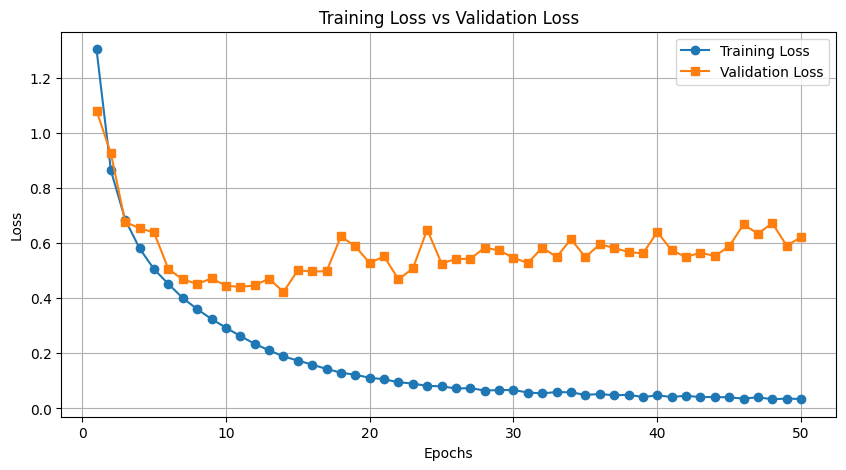

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define ResNet-11 for CIFAR-10
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.dropout1 = nn.Dropout(0.2)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.dropout2 = nn.Dropout(0.2)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != self.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.dropout1(out)
        out = self.bn2(self.conv2(out))
        out = self.dropout2(out)
        out += self.shortcut(x)
        return F.relu(out)

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):  # Changed to 10 classes
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.dropout = nn.Dropout(0.2)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(256 * block.expansion, num_classes)

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.dropout(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avgpool(out)
        out = torch.flatten(out, 1)
        return self.fc(out)

def ResNet11():
    return ResNet(BasicBlock, [2, 2, 2])

# Load CIFAR-10 dataset with correct normalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet11().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store loss values for plotting
train_losses = []
val_losses = []

# Training loop
for epoch in range(1, 51):  # 50 epochs
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    # Validation step
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_acc = 100 * val_correct / val_total
    val_loss /= len(testloader)
    val_losses.append(val_loss)

    print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

print(f"Total Parameters: {sum(p.numel() for p in model.parameters())}")

# Plot training loss vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, 51), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, 51), val_losses, label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.grid()
plt.show()


Problem 3h) ResNet-18 for CIFAR 100 with Dropout

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train Loss: 3.6615, Train Acc: 13.38%, Val Loss: 3.2942, Val Acc: 19.37%
Epoch 2: Train Loss: 2.8287, Train Acc: 27.59%, Val Loss: 2.7711, Val Acc: 28.60%
Epoch 3: Train Loss: 2.3655, Train Acc: 37.35%, Val Loss: 2.4651, Val Acc: 36.04%
Epoch 4: Train Loss: 2.0623, Train Acc: 43.83%, Val Loss: 2.1801, Val Acc: 41.64%
Epoch 5: Train Loss: 1.8346, Train Acc: 49.15%, Val Loss: 1.8982, Val Acc: 47.56%
Epoch 6: Train Loss: 1.6618, Train Acc: 53.33%, Val Loss: 1.7825, Val Acc: 50.84%
Epoch 7: Train Loss: 1.5190, Train Acc: 56.61%, Val Loss: 1.7130, Val Acc: 52.51%
Epoch 8: Train Loss: 1.3971, Train Acc: 59.82%, Val Loss: 1.6479, Val Acc: 54.81%
Epoch 9: Train Loss: 1.2873, Train Acc: 62.78%, Val Loss: 1.5844, Val Acc: 56.44%
Epoch 10: Train Loss: 1.1910, Train Acc: 64.98%, Val Loss: 1.4920, Val Acc: 58.79%
Epoch 11: Train Loss: 1.0961, Train Acc: 67.89%, Val Loss: 1.4760, Val Acc: 59.38%
Epoch 12: Train Loss

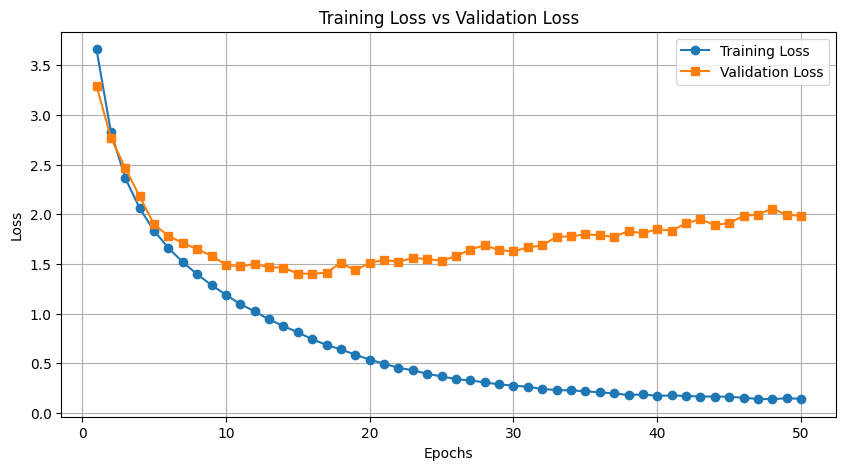

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define ResNet-11 for CIFAR-100
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.dropout1 = nn.Dropout(0.2)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.dropout2 = nn.Dropout(0.2)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != self.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.dropout1(out)
        out = self.bn2(self.conv2(out))
        out = self.dropout2(out)
        out += self.shortcut(x)
        return F.relu(out)

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=100):  # Changed to 100 classes
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.dropout = nn.Dropout(0.2)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(256 * block.expansion, num_classes)

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.dropout(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avgpool(out)
        out = torch.flatten(out, 1)
        return self.fc(out)

def ResNet11():
    return ResNet(BasicBlock, [2, 2, 2])

# Load CIFAR-100 dataset with correct normalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # CIFAR-100 uses the same normalization as CIFAR-10
])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet11().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store loss values for plotting
train_losses = []
val_losses = []

# Training loop
for epoch in range(1, 51):  # 50 epochs
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    # Validation step
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_acc = 100 * val_correct / val_total
    val_loss /= len(testloader)
    val_losses.append(val_loss)

    print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

print(f"Total Parameters: {sum(p.numel() for p in model.parameters())}")

# Plot training loss vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, 51), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, 51), val_losses, label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.grid()
plt.show()
